In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
frequency = 564e3
period = 1/frequency

In [3]:
Class1 = [172, 174, 175, 176, 180]
weights = [534947, 542216, 541453, 540015, 540729]

print(Class1)
nr_cell_pulses = 176
nr_q = 256

dS = np.zeros((len(Class1),nr_cell_pulses,nr_q))

#all q arrays should be the same, you can load any run
q = np.load(f'/gpfs/exfel/exp/SPB/202202/p003046/scratch/data/pa_filtered_runs/qs_runr0{180}.npy')

for i, run in enumerate(Class1): #Class1):
    f = np.load(f'/gpfs/exfel/exp/SPB/202202/p003046/scratch/data/pa_filtered_runs/dS_runr0{run}.npy')
    dS[i] = f[:176]
    

[172, 174, 175, 176, 180]


In [4]:
avg_dS = (np.sum(np.multiply(dS.T,weights),axis=2)/np.sum(weights)).T

(0.0, 21.3173458380012)

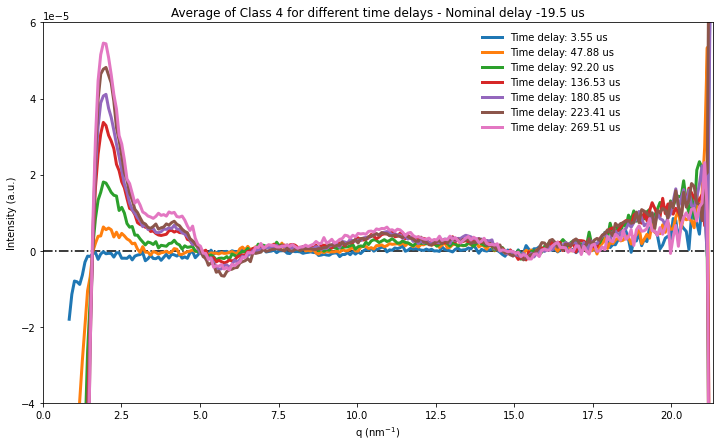

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
plt.title('Average of Class 4 for different time delays - Nominal delay -19.5 us') 

#avg_dS = dS[0]*weights[0]#np.sum(dS,axis=0)/dS.shape[0]
#print(avg_dS.shape)

ax.plot(q, np.sum(avg_dS[1:26,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*13) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[26:50,:],axis = 0).T/24,linewidth=3.0, label= f'Time delay: {(period*1e6*38) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[50:75,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*63) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[75:100,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*88) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[100:125,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*113) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[125:150,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*137) -19.5:.2f} us')
ax.plot(q, np.sum(avg_dS[150:175,:],axis = 0).T/25,linewidth=3.0, label= f'Time delay: {(period*1e6*163) -19.5:.2f} us')

ax.hlines(0, xmin = q[0], xmax = q[-1], color='k', linestyle='-.')
ax.legend(loc=(0.65,0.7), frameon = False)
ax.set_ylabel('Intensity (a.u.)')

ax.set_xlabel('q (nm$^{-1}$)')
ax.set_ylim([-.00004,.00006])
ax.set_xlim([0,q[-1]])